In [8]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [37]:
import matplotlib.ticker as ticker

In [9]:
import seaborn as sns

In [6]:
import numpy as np

In [10]:
data = pd.read_csv("dpwh_flood_control_projects_(cleaned).csv")

In [25]:
print(data.shape)
print(data.columns.tolist())
display(data.head())

(9855, 24)
['Region', 'Province', 'TypeOfWork', 'FundingYear', 'ApprovedBudgetForContract', 'ContractCost', 'ActualCompletionDate', 'StartDate', 'Contractor', 'ContractId', 'ProjectId', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23']


,Region,Province,TypeOfWork,FundingYear,ApprovedBudgetForContract,ContractCost,ActualCompletionDate,StartDate,Contractor,ContractId,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,XIV,Apayao,Construction of Flood Mitigation Structure,2021,96500000,92692943.8,10/3/2022,3/18/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XIV,Apayao,Construction of Flood Mitigation Structure,2021,49000000,47521251.3,11/24/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0019,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XIV,Apayao,Construction of Flood Mitigation Structure,2021,47423180,45942583.67,11/28/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,XIV,Apayao,Construction of Flood Mitigation Structure,2021,9900000,9900000,12/15/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XIV,Apayao,Construction of Flood Mitigation Structure,2021,4950000,4950000,9/23/2022,12/1/2021,ALEPHNORTH PEAK CONSTRUCTION AND DEVELOPMENT CO.,21PC0034,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#drop empty columns
data = data.dropna(axis=1, how='all')
display(data.head())

,Region,Province,TypeOfWork,FundingYear,ApprovedBudgetForContract,ContractCost,ActualCompletionDate,StartDate,Contractor,ContractId,ProjectId
0,XIV,Apayao,Construction of Flood Mitigation Structure,2021,96500000,92692943.8,10/3/2022,3/18/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0018,P00526268LZ
1,XIV,Apayao,Construction of Flood Mitigation Structure,2021,49000000,47521251.3,11/24/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0019,P00526368LZ
2,XIV,Apayao,Construction of Flood Mitigation Structure,2021,47423180,45942583.67,11/28/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0010,P00526369LZ
3,XIV,Apayao,Construction of Flood Mitigation Structure,2021,9900000,9900000,12/15/2022,12/1/2021,ASC CONSTRUCTION & CONCRETE PRODUCTS,21PC0067,P00561270LZ
4,XIV,Apayao,Construction of Flood Mitigation Structure,2021,4950000,4950000,9/23/2022,12/1/2021,ALEPHNORTH PEAK CONSTRUCTION AND DEVELOPMENT CO.,21PC0034,P00561652LZ


In [27]:
#clean money-like columns (remove commas/currency signs -> numeric)
def clean_money(series):
    return pd.to_numeric(series.astype(str).str.replace(r'[^\d\.-]', '', regex=True), errors='coerce')

In [28]:
data['ApprovedBudgetForContract'] = clean_money(data['ApprovedBudgetForContract'])
data['ContractCost'] = clean_money(data['ContractCost'])

In [29]:
#parse data columns
for d in ['StartDate', 'ActualCompletionDate']:
    if d in data.columns:
        data[d] = pd.to_datetime(data[d], errors='coerce')

In [30]:
#recheck all changes
data[['ApprovedBudgetForContract','ContractCost','StartDate','ActualCompletionDate']].head()

,ApprovedBudgetForContract,ContractCost,StartDate,ActualCompletionDate
0,96500000.0,92692943.80,2021-03-18,2022-10-03
1,49000000.0,47521251.30,2021-12-01,2022-11-24
2,47423180.0,45942583.67,2021-12-01,2022-11-28
3,9900000.0,9900000.00,2021-12-01,2022-12-15
4,4950000.0,4950000.00,2021-12-01,2022-09-23


In [32]:
#convert funding year to numeric
if 'FundingYear' in data.columns:
    data['FundingYear'] = pd.to_numeric(data['FundingYear'], errors='coerce')

In [39]:
#add aditional columns

#project duration in days (may be negative if dates is missing)
data['Project Duration'] = (data['ActualCompletionDate'] - data['StartDate']).dt.days

#cost overrun column
data['Cost Overrun'] = (data['ContractCost'] - data['ApprovedBudgetForContract'])

#project deficit column
data['Project Deficit'] = (data['ApprovedBudgetForContract'] - data['ContractCost'])

In [41]:
#count of project by region and province
projects_by_regions = data['Region'].value_counts()
projects_by_provinces = data['Province'].value_counts()

In [43]:
#budgets by funding year
budgets_by_year = data.groupby('FundingYear')['ApprovedBudgetForContract'].sum().sort_index()

In [44]:
#median duration by type of work
median_duration = data.groupby('TypeOfWork')['Project Duration'].median().sort_values()

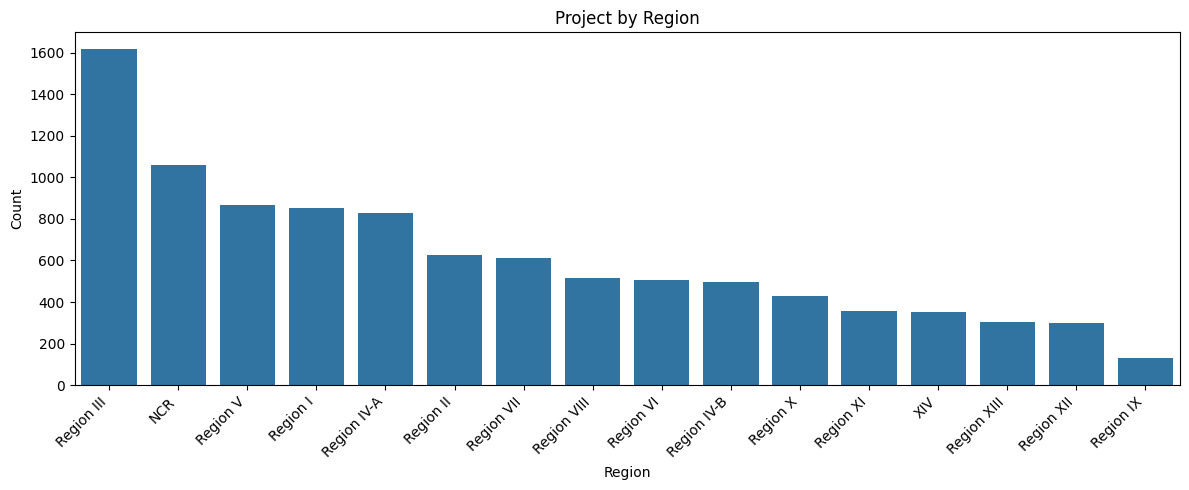

In [47]:
#sample visualization

#Projects per Region
region_count = data['Region'].value_counts().reset_index()
region_count.columns = ['Region', 'Count']

plt.figure(figsize=(12, 5))
sns.barplot(data=region_count, x='Region', y='Count')
plt.xticks(rotation=45, ha='right')
plt.title('Project by Region')
plt.tight_layout()
plt.show()

In [11]:
data["StartDate"] = pd.to_datetime(data["StartDate"])
data["ActualCompletionDate"] = pd.to_datetime(data["ActualCompletionDate"])

print("Data set Preview")
display(data.head)

Data ser Preview


<bound method NDFrame.head of            Region           Province  \
0             XIV             Apayao   
1             XIV             Apayao   
2             XIV             Apayao   
3             XIV             Apayao   
4             XIV             Apayao   
...           ...                ...   
9850  Region XIII  Surigao del Norte   
9851  Region XIII  Surigao del Norte   
9852  Region XIII  Surigao del Norte   
9853  Region XIII  Surigao del Norte   
9854  Region XIII  Surigao del Norte   

                                             TypeOfWork  FundingYear  \
0            Construction of Flood Mitigation Structure         2021   
1            Construction of Flood Mitigation Structure         2021   
2            Construction of Flood Mitigation Structure         2021   
3            Construction of Flood Mitigation Structure         2021   
4            Construction of Flood Mitigation Structure         2021   
...                                                 ...  

In [29]:
duplicate_mask = data.duplicated(subset=["Contractor", "Province", "StartDate", "ActualCompletionDate"], keep=False)
duplicate = data[duplicate_mask].sort_values(by=["Contractor", "Province", "StartDate", "ActualCompletionDate"])

dup_counts = (
    duplicate.groupby(["Contractor"])
    .size()
    .reset_index(name="DuplicateCount")
    .sort_values(by="DuplicateCount", ascending=False)
)

# Only keep true duplicates (count > 1)
dup_counts = dup_counts.head(20)

print("Top 20 Contractor with the most duplicates:")
display(dup_counts)


Top 20 Contractor with the most duplicates:


,Contractor,DuplicateCount
208,QM BUILDERS,37
271,"SUNWEST, INC. (FORMERLY: SUNWEST CONSTRUCTION ...",28
158,LEGACY CONSTRUCTION CORPORATION (FORMERLY: LEG...,28
298,WAWAO BUILDERS,25
54,CENTERWAYS CONSTRUCTION AND DEVELOPMENT INC.,18
285,"TRIPLE 8 CONSTRUCTION & SUPPLY, INC. (FORMERLY...",17
254,SILVERWOLVES CONSTRUCTION CORPORATION,17
297,W.J.P. CONSTRUCTION AND SUPPLY,17
295,VILLAR GENERAL CONSTRUCTION AND SUPPLIES,17
224,RAMARPLUS INCORPORATED (FORMERLY RAMAR ENTERPR...,16


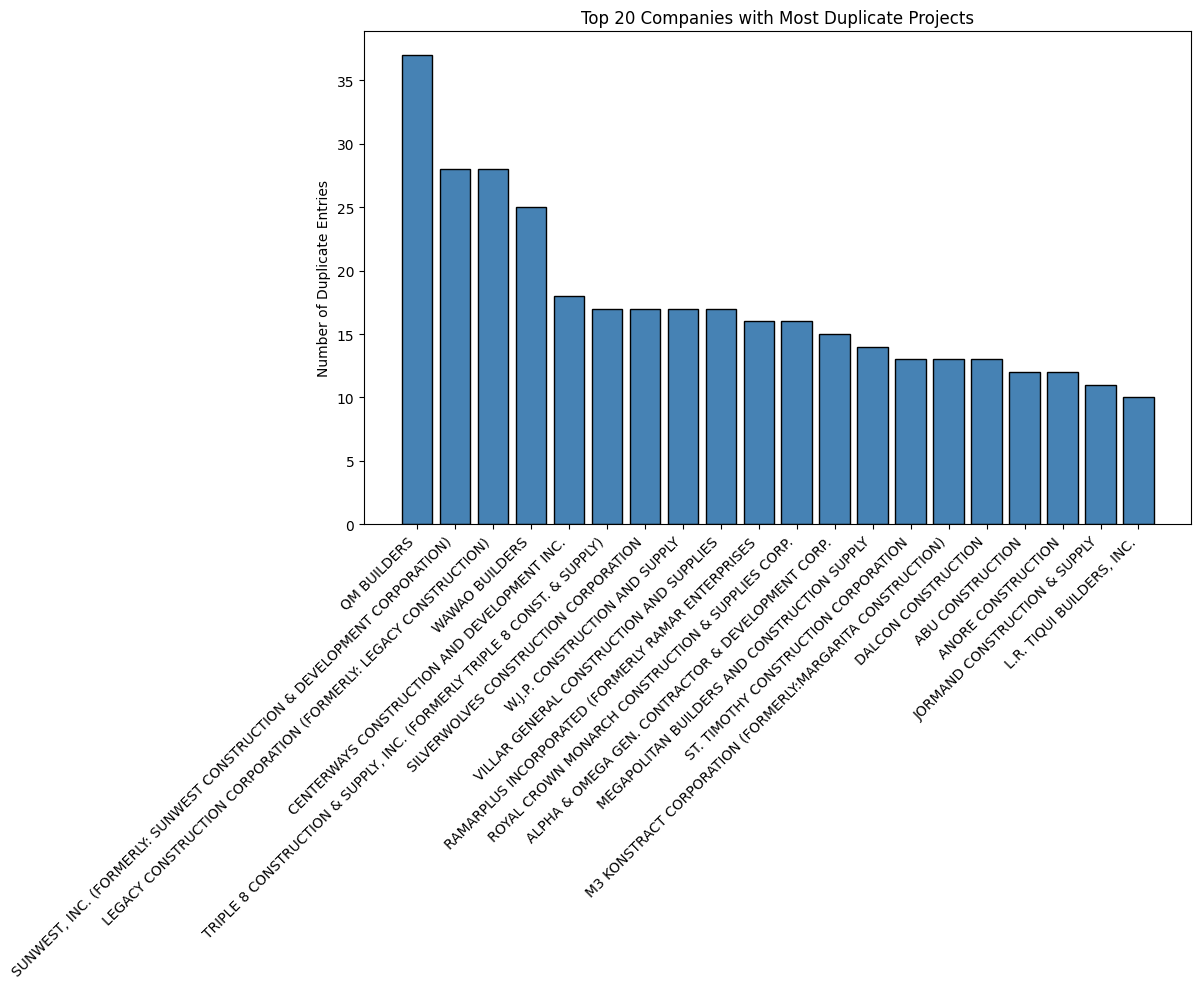

In [42]:
plt.figure(figsize=(12,10))
plt.bar(dup_counts["Contractor"], dup_counts["DuplicateCount"], color="steelblue", edgecolor="black")

plt.title("Top 20 Companies with Most Duplicate Projects")
plt.ylabel("Number of Duplicate Entries")
plt.xticks(rotation=45, ha="right")

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.tight_layout()
plt.show()

In [33]:
#Another Visualization of the Entire Duplicates

duplicate_mask = data.duplicated(subset=["Contractor", "Province", "StartDate", "ActualCompletionDate"], keep=False)
duplicates = data[duplicate_mask].sort_values(by=["Contractor", "Province", "StartDate"])

print("Detected Duplicate Projects:")
display(duplicates)


Detected Duplicate Projects:


,Region,Province,TypeOfWork,FundingYear,ApprovedBudgetForContract,ContractCost,ActualCompletionDate,StartDate,Contractor,ContractId,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
4785,Region IV-A,Laguna,Construction of Flood Mitigation Structure,2022,19600000,19599339.02,2023-12-11,2023-01-09,11 DIAMOND EAGLE CONSTRUCTION CORPORATION (FOR...,22DI0152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4786,Region IV-A,Laguna,Construction of Flood Mitigation Structure,2022,19600000,19597737.55,2023-12-11,2023-01-09,11 DIAMOND EAGLE CONSTRUCTION CORPORATION (FOR...,22DI0151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3043,Region III,Bulacan,Construction of Flood Mitigation Structure,2024,67549958.68,67549453.28,2024-10-17,2024-02-21,11-16 CONSTRUCTION,24CC0140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3044,Region III,Bulacan,Construction of Flood Mitigation Structure,2024,77199988.14,77199509.85,2024-10-17,2024-02-21,11-16 CONSTRUCTION,24CC0141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4000,Region III,Bulacan,Construction of Flood Mitigation Structure,2024,77199919.57,77199909.53,2024-10-24,2024-02-28,11-16 CONSTRUCTION,24CC0181,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,Region I,Ilocos Norte,Construction of Flood Mitigation Structure,2023,58799830.53,57899998.72,2023-08-15,2023-03-13,ZEDIK BUILDERS / MEGAPOLITAN BUILDERS AND CONS...,23AA0108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7628,Region VII,Cebu,Construction of Dike,2023,96305251.57,96305249.03,2023-11-21,2023-03-16,ZLREJ TRADING AND CONSTRUCTION CORPORATION / G...,23HO0121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7629,Region VII,Cebu,Construction of Dike,2023,96112254,96112225.44,2023-11-21,2023-03-16,ZLREJ TRADING AND CONSTRUCTION CORPORATION / G...,23HO0133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5954,Region IX,Zamboanga del Sur,Construction of Flood Mitigation Structure,2024,14700000,14679957.15,2025-04-29,2024-05-09,ZMS CONST. & DEV. CORP. (FORMERLY:ZMS CONSTRUC...,24JG0042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\John Earl\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


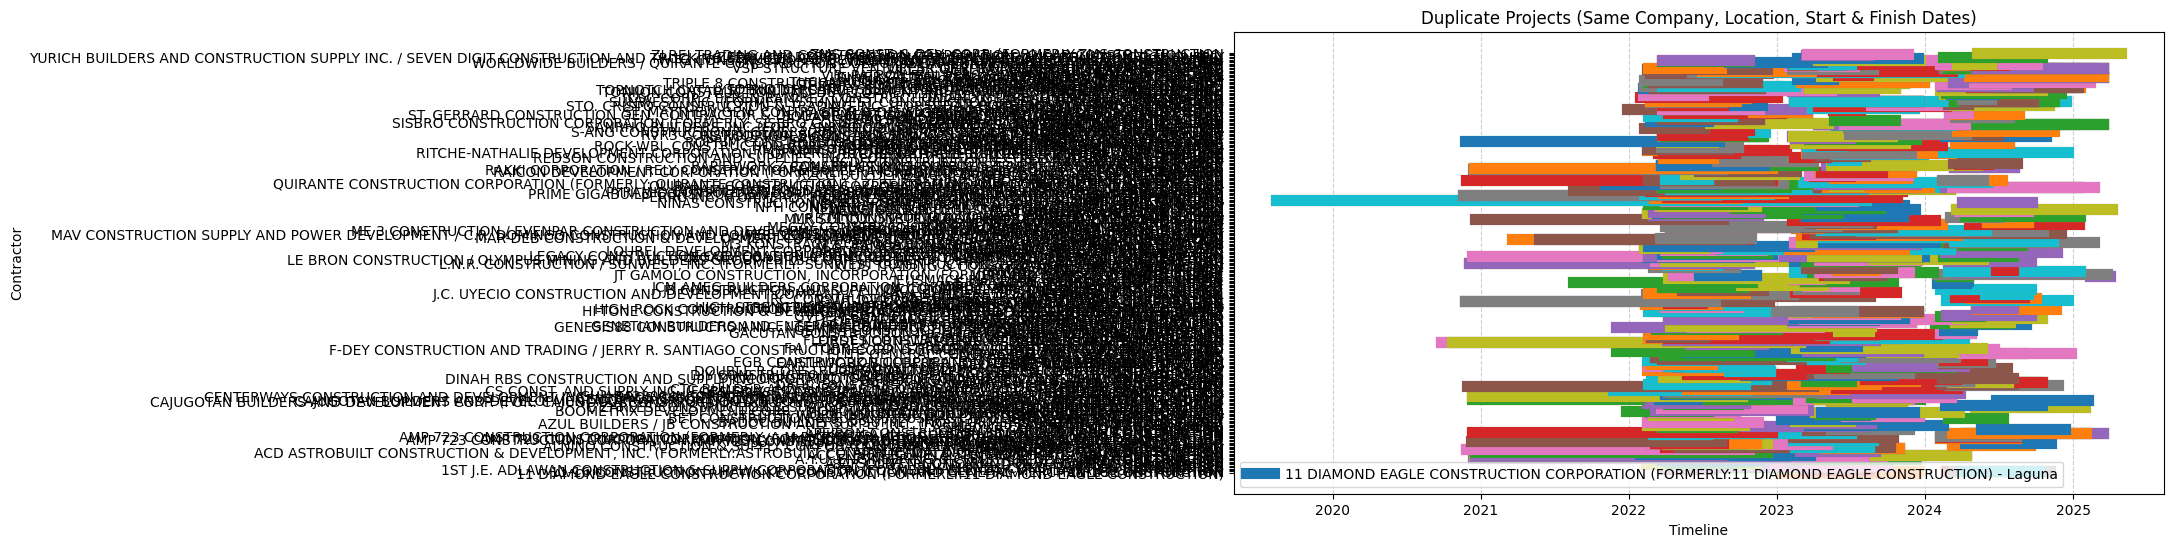

In [34]:
plt.figure(figsize=(12, 6))

for idx, row in duplicates.iterrows():
    plt.plot([row["StartDate"], row["ActualCompletionDate"]],
             [row["Contractor"], row["Contractor"]],
             linewidth=8,
             label=f'{row["Contractor"]} - {row["Province"]}' if idx == duplicates.index[0] else "")

plt.title("Duplicate Projects (Same Company, Location, Start & Finish Dates)")
plt.xlabel("Timeline")
plt.ylabel("Contractor")
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.legend()
plt.show()